<a href="https://colab.research.google.com/github/hollipista/MetaCortex-AAEE/blob/main/03_sp500_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
!wget -O sp500_data_ready.csv.zip https://www.dropbox.com/scl/fi/di2e7ug7c96wekqg450vw/sp500_data_ready.csv.zip?rlkey=42byzuo3p1m4rhqsxrzsx5kwf&dl=0
!unzip -n /content/sp500_data_ready.csv.zip

--2023-11-24 12:43:51--  https://www.dropbox.com/scl/fi/di2e7ug7c96wekqg450vw/sp500_data_ready.csv.zip?rlkey=42byzuo3p1m4rhqsxrzsx5kwf
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfdd7d41f0368f2118d83364905.dl.dropboxusercontent.com/cd/0/inline/CIKyPh1iuPVjDWUEzebvHAiP4aB9L9EdOyihIyAaARal6PNzvxtP0-KWIiEEJQnRR-DdWsYr72Gl0uC-wA3i0qqgPeoRSyzeKDOYnqwzYp2cwCbpW45gLR5uQAEXWTgpYW5qmLN6E8HBfOOA62-9MyDi/file# [following]
--2023-11-24 12:43:53--  https://ucfdd7d41f0368f2118d83364905.dl.dropboxusercontent.com/cd/0/inline/CIKyPh1iuPVjDWUEzebvHAiP4aB9L9EdOyihIyAaARal6PNzvxtP0-KWIiEEJQnRR-DdWsYr72Gl0uC-wA3i0qqgPeoRSyzeKDOYnqwzYp2cwCbpW45gLR5uQAEXWTgpYW5qmLN6E8HBfOOA62-9MyDi/file
Resolving ucfdd7d41f0368f2118d83364905.dl.dropboxusercontent.com (ucfdd7d41f0368f2118d83364905.dl.dropboxusercontent.com)... 162.1

In [5]:
sp500 = pd.read_csv("/content/sp500_data_ready.csv", sep=",")
sp500['date'] = pd.to_datetime(sp500['date'], format='%Y-%m-%d')
sp500.head

<bound method NDFrame.head of       Unnamed: 0       date     open     high      low    close  adjclose  \
0           5754 2001-01-02  1320.28  1320.28  1276.05  1283.27   1283.27   
1           5753 2001-01-03  1283.27  1347.76  1274.62  1347.56   1347.56   
2           5752 2001-01-04  1347.56  1350.24  1329.14  1333.34   1333.34   
3           5751 2001-01-05  1333.34  1334.77  1294.95  1298.35   1298.35   
4           5750 2001-01-08  1298.35  1298.35  1276.29  1295.86   1295.86   
...          ...        ...      ...      ...      ...      ...       ...   
5750           4 2023-11-09  4391.41  4393.40  4343.94  4347.35   4347.35   
5751           3 2023-11-10  4364.15  4418.03  4353.34  4415.24   4415.24   
5752           2 2023-11-13  4406.66  4421.76  4393.82  4411.55   4411.55   
5753           1 2023-11-14  4458.97  4508.67  4458.97  4495.70   4495.70   
5754           0 2023-11-15  4505.30  4521.17  4495.31  4502.88   4502.88   

            volume  return_index   id  
0    

<ipython-input-78-fd94f2b9c1e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_data['days'] = september_data['date'].dt.day
<ipython-input-78-fd94f2b9c1e0>:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(cmap='bone', norm=plt.Normalize(years.min(), years.max())), orientation='vertical', format='%d')


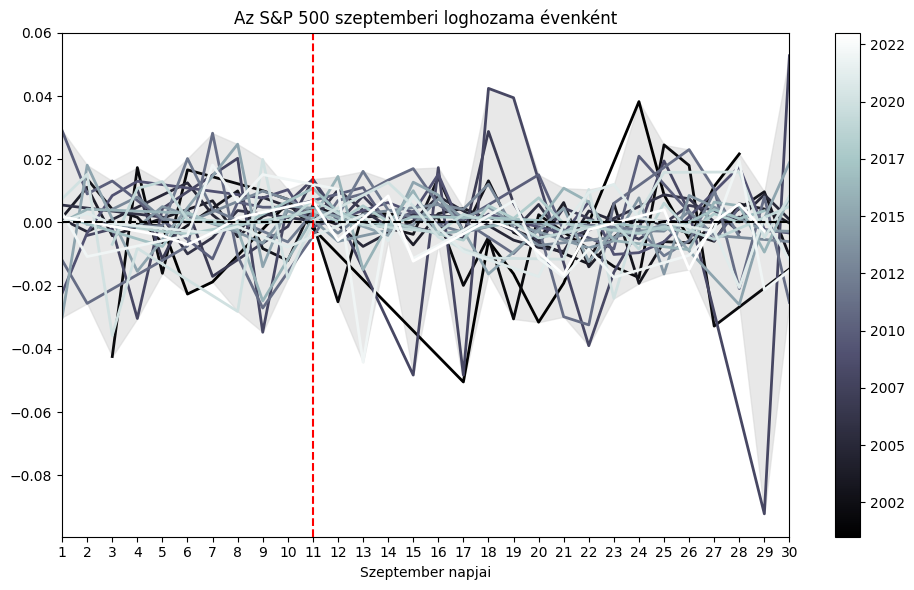

In [78]:
# Szeptemberi adatok kiválasztása
september_data = sp500[(sp500['date'].dt.month == 9)]

# Az évek kinyerése a dátumokból
september_data['days'] = september_data['date'].dt.day

# Vonaldiagram létrehozása az évek alapján
plt.figure(figsize=(10, 6))

# Az évek listája
years = september_data['date'].dt.year.unique()  # Az évek meghatározása a szeptemberi adatokból
normalized_years = (years - years.min()) / (years.max() - years.min())  # Évek normalizálása 0 és 1 között
colors = cm.bone(normalized_years)  # Színátmenet létrehozása

# Min-max
grouped = september_data.groupby([september_data['date'].dt.day])['return_index'].agg(['min', 'max']).reset_index()
grouped.columns = ['days', 'min_return_index', 'max_return_index']
min_values = grouped['min_return_index']
max_values = grouped['max_return_index']
days = grouped.index + 1

for i, year in enumerate(years):
    current_year = september_data[september_data['date'].dt.year == year]
    plt.plot(current_year['days'], current_year['return_index'], label=str(year),
             color=colors[i], linewidth=2)

plt.xlabel('Szeptember napjai')
plt.title('Az S&P 500 szeptemberi loghozama évenként')
plt.legend().set_visible(False)  # Jelmagyarázat elrejtése
plt.xticks(range(1, 31))  # Feliratok beállítása szeptember 1-től szeptember 30-ig
plt.axvline(x=11, color='red', linestyle='--')  # Szeptember 11. piros szaggatott vonal
plt.grid(False)  # Rácsvonalak eltávolítása
plt.axhline(y=0, color='black', linestyle='--')  # Színe, stílusa és egyéb beállítások módosíthatók
plt.xlim(1, 30)

plt.tight_layout()
plt.fill_between(days, min_values, max_values, color='lightgrey', alpha=0.5, zorder=0)

labels = [str(year) for year in range(years.min(), years.max())]
colors = list(reversed(colors))
plt.colorbar(cm.ScalarMappable(cmap='bone', norm=plt.Normalize(years.min(), years.max())), orientation='vertical', format='%d')

# Diagram megjelenítése
plt.show()

2001